In [1]:
# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# first used in exercise two
import pca
from sklearn import preprocessing # for scale
from sklearn.decomposition import PCA

# first used in exercise three
import coorddescent as cd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

Note: Per the request in the "Collaboration policy" note, I've discussed at least part of this assignment with many of the MS employees in the class, including Amitabh, Abhishek, Geoff, Suman, Charles, and Salik. (Different weeks/different assignments have different people, depending upon who attends our study groups, but I'll probably just include this blurb w/ each homework since it's generally correct.) I've also gotten input from the discussion board.

# Exercise One

Apologies for the large images - I haven't yet made the time to figure out how to get these to show at a better size.

## First loss function

![1a](1a.jpg)

# Second loss function

![1b](1b.jpg)

## Third loss function

![1c](1c.jpg)

# Exercise Two

*"(a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. Hint: There are a number of functions in numpy that you can use to generate data. One example is the numpy.random.normal() func- tion; numpy.random.uniform() is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes."*

I've submitted my implementation in the pca.py file. I use this implementation in this notebook - I imported the module above without an alias. In addition, I also included the single test I wrote as part of doing the implementation in the file pca-test.py. (It would be nice to have written more tests.)

A quick note: I had a hard time getting the algorithm to converge when I used very small mean shifts of 0.5 - I tried a lot of different step size value combinations and got nothing but non-convergence. I was able to get it to converge with a larger mean shift, so I'm going with that larger mean shift here.

In [3]:
# from sklearn.datasets import fetch_lfw_people

# faces = fetch_lfw_people(min_faces_per_person=30) 
# print(faces.target_names)  # Images of 34 different people
# print(faces.images.shape)  # 2370 images, each of which is 62x47 pixels
# print(faces.data.shape)    # Each image is unravelled to a vector of size 2914

In [4]:
mean_vals = [0, 10, 20]
np.random.seed(42)
d = pd.DataFrame(np.vstack([np.random.normal(mean, 
                        size=(20,50)) for mean in mean_vals]))
d.insert(0, 'Class', np.repeat(['A','B','C'], 20))
d[:1]

,Class,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,A,0.496714,-0.138264,0.647689,1.52303,-0.234153,-0.234137,1.579213,0.767435,-0.469474,...,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.76304


In [5]:
d_values = d.values[:, 1:51].astype('float')
d_values_centered = preprocessing.scale(d_values, with_std=False)
d_values_centered[0]

array([ -9.47652431, -10.36087989,  -9.29538686,  -8.58559277,
       -10.16925639, -10.28390443,  -8.43284888,  -9.41223556,
       -10.46780705,  -9.85403586, -10.39694444, -10.58329323,
        -9.84789351, -11.77688128, -12.0374925 , -10.61884412,
       -11.00006027,  -9.6519797 , -10.75006323, -11.58583051,
        -8.81179199, -10.29558276,  -9.91366629, -11.39948789,
       -10.70784122,  -9.85670811, -11.13090521,  -9.8084079 ,
       -10.73701623, -10.46793313, -10.56025456,  -7.99222798,
        -9.95515398, -11.09243514,  -9.20584621, -11.29344291,
        -9.73924429, -11.91219899, -11.31890736,  -9.77094352,
        -9.32654553,  -9.90398641, -10.16759232, -10.2470722 ,
       -11.37186667, -10.72705805, -10.23186415,  -8.66765149,
        -9.90986555, -11.76248424])

In [6]:
#X = faces.data
#eta_0, t_0, epoch_count = .00001, 1, 50

X = d_values
eta_0, t_0, epoch_count = 0.001, 2, 100

*"(b) Run your own normalized Oja algorithm on the 60 observations. You should try to implement the algorithm yourself, but you may look back at the labs if you need help. Plot the first two principal component score vectors. Compare your results to the ones obtained with scikit-learn’s PCA algorithm. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then you’re done and you can launch the computations on AWS. If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes."*

## First get the principal component vectors

In [7]:
pca_mine = pca.oja_fit(d_values_centered, 2, 0.001, 2, 100)
pca_mine

array([[-0.14233808, -0.14325841, -0.1412073 , -0.13801909, -0.13976854,
        -0.14364452, -0.13991588, -0.14104627, -0.14228377, -0.14028263,
        -0.13925675, -0.14082025, -0.14095172, -0.13850047, -0.14332036,
        -0.14209849, -0.13842665, -0.13647461, -0.14296221, -0.14077913,
        -0.14063061, -0.14656803, -0.13859503, -0.14020938, -0.14084308,
        -0.14367034, -0.14535419, -0.14171067, -0.14213515, -0.14140917,
        -0.14192608, -0.1424767 , -0.14370792, -0.14301991, -0.1391046 ,
        -0.14296572, -0.14035296, -0.14268456, -0.13853477, -0.14386945,
        -0.14474611, -0.13853374, -0.14457914, -0.13896496, -0.1406518 ,
        -0.14347555, -0.14219766, -0.13715138, -0.14139773, -0.14340828],
       [-0.25272171, -0.11417458, -0.05425078,  0.24955044,  0.0732108 ,
        -0.17703835,  0.06468499, -0.20463734,  0.1444755 , -0.0614932 ,
        -0.01203612,  0.17646   , -0.17187869, -0.18488356, -0.077395  ,
         0.13801135, -0.20147526, -0.37529502, -0.

In [8]:
pca_sklearn = PCA(2, svd_solver='full')
pca_sklearn.fit(X)
print(pca_sklearn.components_[0])
print(pca_sklearn.components_[1])

[-0.14233391 -0.14325963 -0.1412039  -0.13801734 -0.13977184 -0.14364433
 -0.13991273 -0.14104493 -0.14228272 -0.14028026 -0.13925715 -0.14081765
 -0.1409513  -0.13850097 -0.1433206  -0.14209824 -0.13842943 -0.13647746
 -0.14296263 -0.14078382 -0.1406264  -0.14656184 -0.13859031 -0.14020859
 -0.14084239 -0.14366725 -0.14535678 -0.14170943 -0.14213593 -0.14141145
 -0.14192793 -0.14247393 -0.14370843 -0.14302147 -0.13910328 -0.14296752
 -0.14035279 -0.14268592 -0.13854042 -0.14386981 -0.14474806 -0.13853575
 -0.14457845 -0.13896695 -0.14065459 -0.14347999 -0.1421975  -0.13715082
 -0.14139857 -0.14340664]
[-0.14820248 -0.15577997 -0.02747821  0.05217483  0.09001604  0.21697314
  0.04838229  0.0579049   0.1868853   0.07290217 -0.1472483   0.10724179
 -0.21673595 -0.23128117  0.08330134  0.00877515  0.22128086  0.03809422
  0.00873939 -0.0690226   0.24575393  0.15597047  0.08329307 -0.00890795
 -0.25341302  0.06472497 -0.00552899  0.02767339 -0.23068174 -0.2512671
  0.02564334  0.17065277  

## Then transform the data and plot

I did a lot of work to try to find a set of eta_0 and t_0 values that would enable my algorithm to give the same values for the second principal component as did sklearn. My algorithm matched sklearn - in both vectors, when I used the faces data from the lab. When I switched to my data, and when I found a different set of eta_0 and t_0 params, the first principal component vector matched sklearn, but the second did not. Given that the algorithm worked with other data, it seemed like it was just that I didn't have a good set of parameters, so I did further work to try to find them, but in the end didn't. Interestinginly, the transformed data still clusters very well, as shown by the first plot below. (Also, I've saved some of that code below - it iterates over a grid of possible settings and prints out rows where the first component vector is what we'd expect. The second component vector though never matches sklearn.)

In [9]:
d['mine_PCA1'] = d_values_centered.dot(pca_mine[0])
d['mine_PCA2'] = d_values_centered.dot(pca_mine[1])

In [10]:
values_sklearn_PCA = pca_sklearn.transform(d_values_centered)
values_sklearn_PCA.shape

(60, 2)

In [11]:
# and add sklearn PCA values to dataframe
d['sklearn_PCA1'] = values_sklearn_PCA[:, 0]
d['sklearn_PCA2'] = values_sklearn_PCA[:, 1]

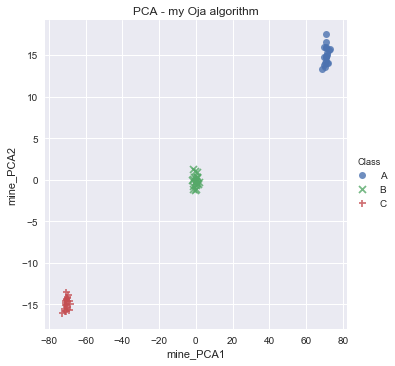

In [12]:
sns.lmplot("mine_PCA1", "mine_PCA2", hue="Class", 
           markers=["o","x","+"], data=d, fit_reg=False)
sns.plt.title("PCA - my Oja algorithm")

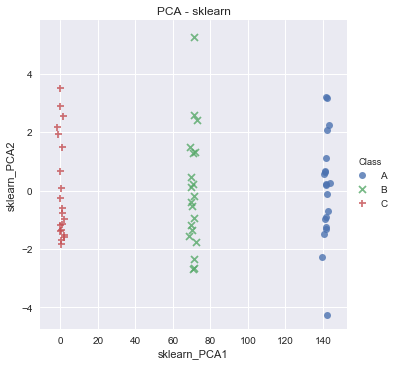

In [13]:
sns.lmplot("sklearn_PCA1", "sklearn_PCA2", hue="Class", 
           markers=["o","x","+"], data=d, fit_reg=False)
sns.plt.title("PCA - sklearn")

In [14]:
# See text above for what this is.
# Z = X - np.mean(X, axis=0)  # center the data

# epoch_count = 250
# low_thresh = 0.139
# high_thresh = 0.145

# for eta_0 in [10**k for k in range(-12, 5)]:
#     for t_0 in [10**k for k in range(-12, 5)]:
#         print("eta_0: {}, t_0: {}".format(eta_0, t_0))
#         for i in range(0,3):
#             a_0 = np.random.randn(np.size(Z, 1))  # starting point
#             a_0 /= np.linalg.norm(a_0, axis=0)
#             v1, _ = pca.oja(copy.deepcopy(Z), a_0, eta_0, t_0, epoch_count)

#             Z1 = pca.deflate(Z, v1)
#             v2, _ = pca.oja(copy.deepcopy(Z1), a_0, eta_0, t_0, epoch_count)

#             if np.all((np.abs(v1[:3]) > low_thresh) & (np.abs(v1[:3]) < high_thresh)):
#                 print("{} - {}".format(v1[:3], v2[:3]))

# Exercise Three

*"(a) Use the numpy.random.normal() function to generate a predictor X of length n = 100, as well as a noise vector ε of length n = 100."*

In [15]:
X = np.random.normal(size=100)
e = np.random.normal(size=100)
(X.shape, e.shape)

((100,), (100,))

*"(b) Generate a response vector Y of length n = 100 according to the model Y =β0 +β1X+β2X2 +β3X3 +ε,
where β0, β1, β2, and β3 are constants of your choice. Here superscripts denote powers of X."*

I'm just choosing some coefficients.

In [16]:
b0 = 27
b1 = 11
b2 = 5
b3 = 3

In [17]:
y = b0 + (b1*X) + (b2*(X**2)) + (b3*(X**3)) + e
y.shape

(100,)

In [18]:
# and we'll make X a 100,1 array rather than a vector,
# for better use w/ sklearn functions
X = X[:, np.newaxis]
X.shape

(100, 1)

And we'll scale X and center y. 

In [19]:
X_scaled = preprocessing.scale(X)
y_centered = preprocessing.scale(y, with_std=False)

*"(c) Now fit a LASSO model to the simulated data using your own coordinate descent algorithm. Use X, X2, . . . , X10 as predictors. Set λ = 1."*

Note that I found with lambda = 1 that I didn't get close convergence for all coefficients: although some of the higher coefficients had numbers didn't jump around a huge amount, they did jump around some. That said, the lower coefficients - the first four - stayed pretty constant (and the fifth and six were zeroed out by the algorithm). (This held regardless of whether I bumped up the iterations to something like 5000.)

I also tried this with both my implementation from last week and Corinne's implementation from the solution. I've submitted this code the coorddescent.py file, which I've imported above with the alias 'cp'. Given more time I would have done further work to learn check my code against Corinne's and to resolve any differences - this given the prof's comment on Wednesday night that he'd like us to update our own implementations with learnings. Coming just a few days before the homework was due (and given that I'd already finished the majority of the assignment because I knew I had family stuff on Thursday and Friday), I'm going to turn this in as is for now.

In [20]:
X_scaled_poly10 = PolynomialFeatures(degree=10, include_bias=False).fit_transform(X_scaled)
X_scaled_poly10.shape

(100, 10)

In [25]:
n = np.size(X_scaled_poly10, 0)
beta_init = np.zeros(np.size(X_scaled_poly10, 1))
max_iter = 1000

In [36]:
cd.corinne_randcoorddescent(beta_init, X_scaled_poly10, y_centered, 1, max_iter)[-1, :]

array([  1.00542148e+01,  -4.32120342e+00,   1.50688619e+00,
         3.77864968e+00,   2.16438536e-01,  -3.76271842e-01,
        -4.98474227e-03,  -6.73695334e-02,  -3.36642125e-03,
         9.96753719e-03])

In [41]:
cd.get_final_coefs(cd.andrew_randcoorddescent(X_scaled_poly10, y_centered, 1, max_iter))

array([  1.08051772e+01,  -1.31719349e+00,   7.02048418e-01,
         1.06207812e+00,   1.00359734e-01,   8.74521687e-02,
         1.58999931e-01,  -3.17082462e-03,  -2.59217460e-02,
        -4.15398586e-03])

*"(d) Select the optimal value of λ on a held-out validation set using your own coordinate descent algorithm. Create plots of the error on the validation set as a function of λ for your own coordinate descent algorithm and scikit-learn’s LASSO algorithm; use different colors for the two curves. Discuss the results obtained.*

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_poly10, y_centered, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 10), (25, 10), (75,), (25,))

In [28]:
def mse_from_beta_coefs(beta_coefs, X, y):
    return mean_squared_error(y, X.dot(beta_coefs))

In [29]:
lambdas = [10**k for k in range(-8, 5)]
lambdas

[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [31]:
def mse_for_lambda_corinneimpl(lam, X_train, X_test, y_train, y_test):
    beta_init = np.zeros(np.size(X_train, 1))
    betas_rand = cd.corinne_randcoorddescent(beta_init, X_train, y_train, lam, max_iter)
    return(mse_from_beta_coefs(betas_rand[-1, :], X_test, y_test))

mses_corinneimpl = [mse_for_lambda_corinneimpl(lam, X_train, X_test, y_train, y_test) for lam in lambdas]
list(zip(lambdas, mses_corinneimpl))

[(1e-08, 6.5162890234205726),
 (1e-07, 6.4262748343463736),
 (1e-06, 6.4548601646075339),
 (1e-05, 6.6521234584382567),
 (0.0001, 6.5078247319098628),
 (0.001, 6.5473077397325588),
 (0.01, 6.2798824575455976),
 (0.1, 6.2341861598805153),
 (1, 6.4241227577561917),
 (10, 6.7245282655168195),
 (100, 10.701137412442888),
 (1000, 55.833252990546228),
 (10000, 84.496204577152881)]

In [42]:
def mse_for_lambda_andrewimpl(lam, X_train, X_test, y_train, y_test):
    betas_rand = cd.andrew_randcoorddescent(X_train, y_train, lam, max_iter)
    return(mse_from_beta_coefs(cd.get_final_coefs(betas_rand), X_test, y_test))

mses_andrewimpl = [mse_for_lambda_andrewimpl(lam, X_train, X_test, y_train, y_test) for lam in lambdas]
list(zip(lambdas, mses_andrewimpl))

[(1e-08, 7.144559389647184),
 (1e-07, 6.8125382259060165),
 (1e-06, 6.7410608564395966),
 (1e-05, 6.0845749894961791),
 (0.0001, 7.185041442622671),
 (0.001, 6.8765125501785427),
 (0.01, 7.1647464503791953),
 (0.1, 7.6922244568052109),
 (1, 7.9896533450008533),
 (10, 7.1644150182649238),
 (100, 10.928247636062558),
 (1000, 59.433345180087798),
 (10000, 84.496204577152881)]

In [32]:
def mse_for_lambda_sklearn(lam, X_train, X_test, y_train, y_test):
    results = Lasso(alpha=lam, fit_intercept=False, max_iter=10000000).fit(X_train, y_train)
    return(mse_from_beta_coefs(results.coef_, X_test, y_test))

mses_sklearn = [mse_for_lambda_sklearn(lam, X_train, X_test, y_train, y_test) for lam in lambdas]
list(zip(lambdas, mses_sklearn))

# Side note: there's opportunity for reducing duplication - we have three functions that really do the 
# same thing - likely by injecting the function that gets the coefs; I won't worry about that now, 
# though it bugs me to leave it this way :-)

[(1e-08, 4.9305273944384362),
 (1e-07, 4.9305254594260024),
 (1e-06, 4.930506110931578),
 (1e-05, 4.930312797427848),
 (0.0001, 4.9283967978902297),
 (0.001, 4.9109478761437853),
 (0.01, 5.0619695414328483),
 (0.1, 7.2352067384078218),
 (1, 13.247445306209954),
 (10, 66.28411617550772),
 (100, 89.858044243518549),
 (1000, 94.537667918941608),
 (10000, 107.8089734870248)]

In [43]:
mses = pd.DataFrame({'Corinne': mses_corinneimpl,
                     'Andrew': mses_andrewimpl,
                     'Sklearn': mses_sklearn}, index=lambdas)
mses

,Andrew,Corinne,Sklearn
1.000000e-08,7.144559,6.516289,4.930527
1.000000e-07,6.812538,6.426275,4.930525
1.000000e-06,6.741061,6.454860,4.930506
1.000000e-05,6.084575,6.652123,4.930313
1.000000e-04,7.185041,6.507825,4.928397
1.000000e-03,6.876513,6.547308,4.910948
1.000000e-02,7.164746,6.279882,5.061970
1.000000e-01,7.692224,6.234186,7.235207
1.000000e+00,7.989653,6.424123,13.247445
1.000000e+01,7.164415,6.724528,66.284116


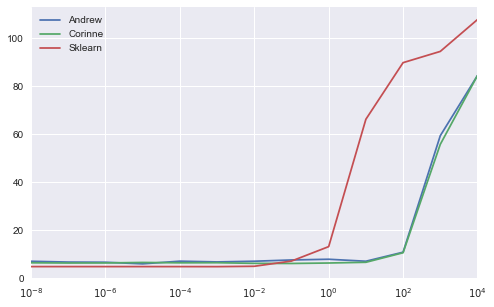

In [44]:
mses.plot(logx=True) 

*"(e) Now generate a response vector Y according to the model Y = β0 + β7X7 + ε. Fit a LASSO model using your own coordinate descent algorithm and scikit-learn’s LASSO algorithm. Discuss the results obtained."*

I generated coefficients from three sets of code: my code, Corinne's code, and sklearn's code. None of them are the same or even similar. The MSE using the optimal coefficents from the three sets of code isn't super different, so it could be that all three solutions are satisfactory in the sense of minimizing the error. With the chosen value of lambda, both my and Corinne's implementation didn't zero out any coefficients, while the sklearn solution zeroed out three coefficients. Given that the objective function used by sklearn is different from the function used by my and Corinne's code it could be that I'd need to use a different higher value of lambda to get zeroed coefficients with my and Corinne's code.

In [47]:
b7 = 12
new_y = b0 + (b7*(X[:,0]**7)) + e
print(new_y.shape)

(100,)


In [48]:
new_y_centered = preprocessing.scale(new_y, with_std=False)
np.mean(new_y_centered), np.std(new_y_centered)

(-2.4158453015843408e-15, 329.86034718203467)

In [49]:
# setting lambda to the highest value that gave low MSEs for both
# my implementation and sklearn
optimal_lambda = 1 

beta_init = np.zeros(np.size(X_scaled_poly10, 1))
betas_rand = cd.corinne_randcoorddescent(beta_init, X_scaled_poly10, new_y_centered, 
                                         optimal_lambda, max_iter)
print(betas_rand[-1,:])
print(mse_from_beta_coefs(betas_rand[-1, :], X_scaled_poly10, new_y_centered))

[  5.48944242  21.20866904 -20.27914524 -10.29181576  17.77872419
  -0.35920738   0.29941301   0.15411758   0.4844817   -0.03209602]
46.6660978366


In [50]:
betas_rand = cd.andrew_randcoorddescent(X_scaled_poly10, new_y_centered, 
                                        optimal_lambda, max_iter)
print(cd.get_final_coefs(betas_rand))
print(mse_from_beta_coefs(cd.get_final_coefs(betas_rand), X_scaled_poly10, new_y_centered))

[  1.23927688e+01   1.93558629e+01  -3.24967523e+01  -8.13587525e+00
   2.22542620e+01  -6.10802326e-01   5.19909811e-02  -3.50860910e-02
   4.40997312e-01   1.74321032e-03]
51.3429095276


In [51]:
results_sklearn = Lasso(alpha=optimal_lambda, fit_intercept=False, 
                        max_iter=10000000).fit(X_scaled_poly10, new_y_centered)
print(results_sklearn.coef_)
print(mse_from_beta_coefs(results_sklearn.coef_, X_scaled_poly10, new_y_centered))

[  0.00000000e+00   7.83107360e+00   0.00000000e+00  -0.00000000e+00
   2.13438720e-01  -1.94139195e+00   5.48410073e+00  -1.01908482e-01
  -1.72211062e-03   2.16746747e-02]
59.2349011805


# Exercise Four

This week I finally made progress on the Kaggle competition.

* I worked with multiple different types of AMIs and in the end was able to get things to work (I think, and so far) with the 1.3 version of the Deep Learning AMI. 
* I formatted the code from the https://www.kernix.com/blog/image-classification-with-a-pre-trained-deep-neural-network_p11 blog post correctly, got it checked into my private Data 558 GitHub repo, and cloned the repo on my EC2 instance. 
* Then, with the help of the info at https://www.tensorflow.org/tutorials/image_recognition and on StackOverflow, I cloned the TensorFlow models repo to get the ImageNet download/creation code, and successfully ran the classify_image.py code to download and set up the trained model.
* Now, when trying to run the images_to_features.py code, I'm getting an error from TensorFlow when it tries to load the graph ('google.protobuf.message.DecodeError: Truncated message'). I'll continue to work on it.

# Exercise Five

At this point I don't have anything additional to add over what I wrote last week - please refer there if needed. 